In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
#Подгружаем данные
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')

In [3]:
#Помечаем тренировочный и тестовый сеты
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_train.append(df_test).reset_index(drop=True)

c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
#Выводим инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
sample            41188 non-null object
target     

In [5]:
df.head()

,_id,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,duration,education,...,job,loan,marital,month,nr.employed,pdays,poutcome,previous,sample,target
0,df7489733b004bbe40d3d37b34f82419,54,1,-36.1,93.444,cellular,tue,unknown,87,professional.course,...,technician,no,married,aug,5228.1,999,nonexistent,0,train,0.0
1,905a0b9a5456ee962223033473666be3,36,1,-36.4,93.994,telephone,mon,no,291,basic.4y,...,services,no,single,may,5191.0,999,nonexistent,0,train,0.0
2,02d69c07ec6d68e31d641edd45ce61cd,53,1,-36.1,93.444,cellular,mon,no,182,basic.4y,...,blue-collar,no,married,aug,5228.1,999,nonexistent,0,train,0.0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,2,-36.4,93.994,telephone,wed,no,180,basic.9y,...,blue-collar,yes,married,may,5191.0,999,nonexistent,0,train,0.0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,1,-38.3,94.027,telephone,fri,no,6,university.degree,...,services,no,single,aug,4991.6,999,nonexistent,0,train,0.0


In [6]:
#Создаем функцию обработки данных (удаляет ненужные столбцы, заменяет пропуски, кодирует категориальные признаки)
def preproc_data(df_input):
    df_output = df_input.copy()
    
    #Удаляем идентификатор и добавленный нами столбец sample (вернем его позже)
    df_output = df_output.drop(['_id','sample'], axis=1)
    #Меняем yes/no на 1/0
    df_output = df_output.replace("no", 0)
    df_output = df_output.replace("yes", 1)
    #Заменяем unknown на NaN
    df_output = df_output.replace("unknown", np.nan)
    #Заменяем пропуска на моду (в категориальных признаках) и на среднее (в числовых)
    df_output[['job','marital','education']] = df_output[['job','marital','education']].fillna(df_output.mode().loc[0])
    df_output = df_output.fillna(df_output.mean())
    #Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=df_output.select_dtypes(include=object).columns)
    #Возвращаем sample
    df_output['sample'] = df_input['sample']
    
    return df_output

In [7]:
#Обабатываем функцией выше наш датафрейм, делим его на тренировочный и тестовый сеты
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)
df_preproc = df_preproc.drop(['sample'], axis=1)

In [8]:
#Задаем таргет и удаляем его из датафреймов
from sklearn.model_selection import train_test_split

y = df_train_preproc['target']
X = df_train_preproc.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#Объявляем модель и делаем предсказание
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')
model_dtc = DecisionTreeClassifier()
model_lr = LogisticRegression(penalty='l1', C=1, fit_intercept=True)

model_knn.fit(X_train, y_train)
model_dtc.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

predict_knn = model_knn.predict(X_test)
predict_dtc = model_dtc.predict(X_test)
predict_lr = model_lr.predict(X_test)

c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
#Смотрим метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Метрики KNN:")
print('precision', precision_score(y_test, predict_knn))
print('recall', recall_score(y_test, predict_knn))
print('accuracy', accuracy_score(y_test, predict_knn))
print("Метрики DTC:")
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
print("Метрики LR:")
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))

Метрики KNN:
precision 0.5586592178770949
recall 0.4744958481613286
accuracy 0.8976261127596439
Метрики DTC:
precision 0.4941860465116279
recall 0.5041518386714117
accuracy 0.884947396816833
Метрики LR:
precision 0.6699029126213593
recall 0.4092526690391459
accuracy 0.9099001888319396


In [11]:
#Делаем кросс-валидацию и считаем средний roc_auc
#Кросс-валидацию LR не делаю, тк не хватает вычислительных мощностей =(
from sklearn.model_selection import cross_val_score

cross_val_score_knn = cross_val_score(model_knn, X, y, scoring='roc_auc', cv=10)
print("Средний roc_auc KNN:")
print(cross_val_score_knn.mean())

cross_val_score_dtc = cross_val_score(model_dtc, X, y, scoring='roc_auc', cv=10)
print("Средний roc_auc DTC:")
print(cross_val_score_dtc.mean())

Средний roc_auc KNN:
0.8305532658978411
Средний roc_auc DTC:
0.7377724871764066


In [12]:
#Считаем roc_auc
from sklearn.metrics import roc_auc_score, roc_curve

predict_proba_knn = model_knn.predict_proba(X_test)
print('roc_auc', roc_auc_score(y_test, predict_proba_knn[:,1]))

predict_proba_dtc = model_dtc.predict_proba(X_test)
print('roc_auc', roc_auc_score(y_test, predict_proba_dtc[:,1]))

predict_proba_lr = model_lr.predict_proba(X_test)
print('roc_auc', roc_auc_score(y_test, predict_proba_lr[:,1]))

roc_auc 0.8165395850381805
roc_auc 0.7189759345540896
roc_auc 0.9345593248886647


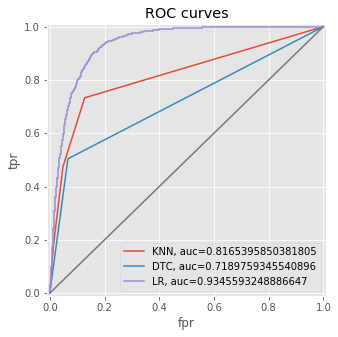

In [13]:
#Строим ROC кривую
from sklearn import metrics

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, predict_proba_knn[:,1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_proba_dtc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_proba_lr[:,1])

plt.figure(figsize=(5, 5))

auc_knn = metrics.roc_auc_score(y_test, predict_proba_knn[:,1])
auc_dtc = metrics.roc_auc_score(y_test, predict_proba_dtc[:,1])
auc_lr = metrics.roc_auc_score(y_test, predict_proba_lr[:,1])

plt.plot(fpr_knn, tpr_knn, label="KNN, auc="+str(auc_knn))
plt.plot(fpr_dtc, tpr_dtc, label="DTC, auc="+str(auc_dtc))
plt.plot(fpr_lr, tpr_lr, label="LR, auc="+str(auc_lr))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curves')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

In [14]:
#Берем лучшую модель и делаем предсказание на тесте
model = model_lr.fit(X, y)
predict = model.predict(df_test_preproc.drop(['target'], axis=1))

c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\александр\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
#Выгружаем предсказание
se = pd.Series(predict)
df_test['target'] = se.values
df_results = df_test[['_id','target']]
df_results.to_csv('result.csv', sep=',', encoding='utf8', index=False, columns=('_id', 'target'))